# Importing Libraries and Data Loading

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/GioElbert/indian-db/main/adult.csv"
income_data = pd.read_csv(url)

# Data Understanding and Cleaning

In [4]:
# Checking for missing values and basic statistics
income_data.isnull().sum()

# Statistik deskriptif
income_data.describe(include='all')

# Inspect data structure
income_data.info()

# Menampilkan 5 baris pertama
income_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [8]:
# Dropping rows with missing values, if any
income_data = income_data.dropna()

# Encoding categorical features using Label Encoding or One-Hot Encoding
income_data = pd.get_dummies(income_data, drop_first=True)


# Exploratory Data Analysis (EDA) dan Preprocessing

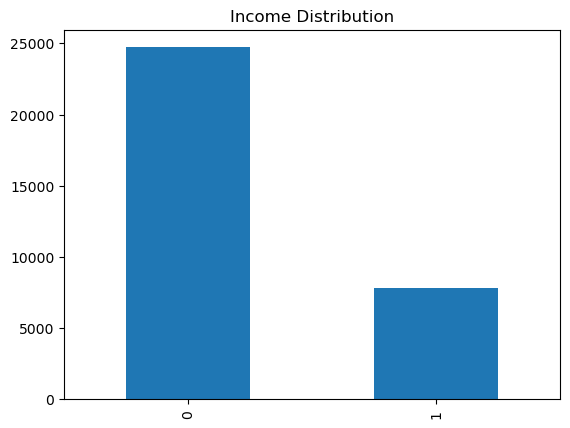

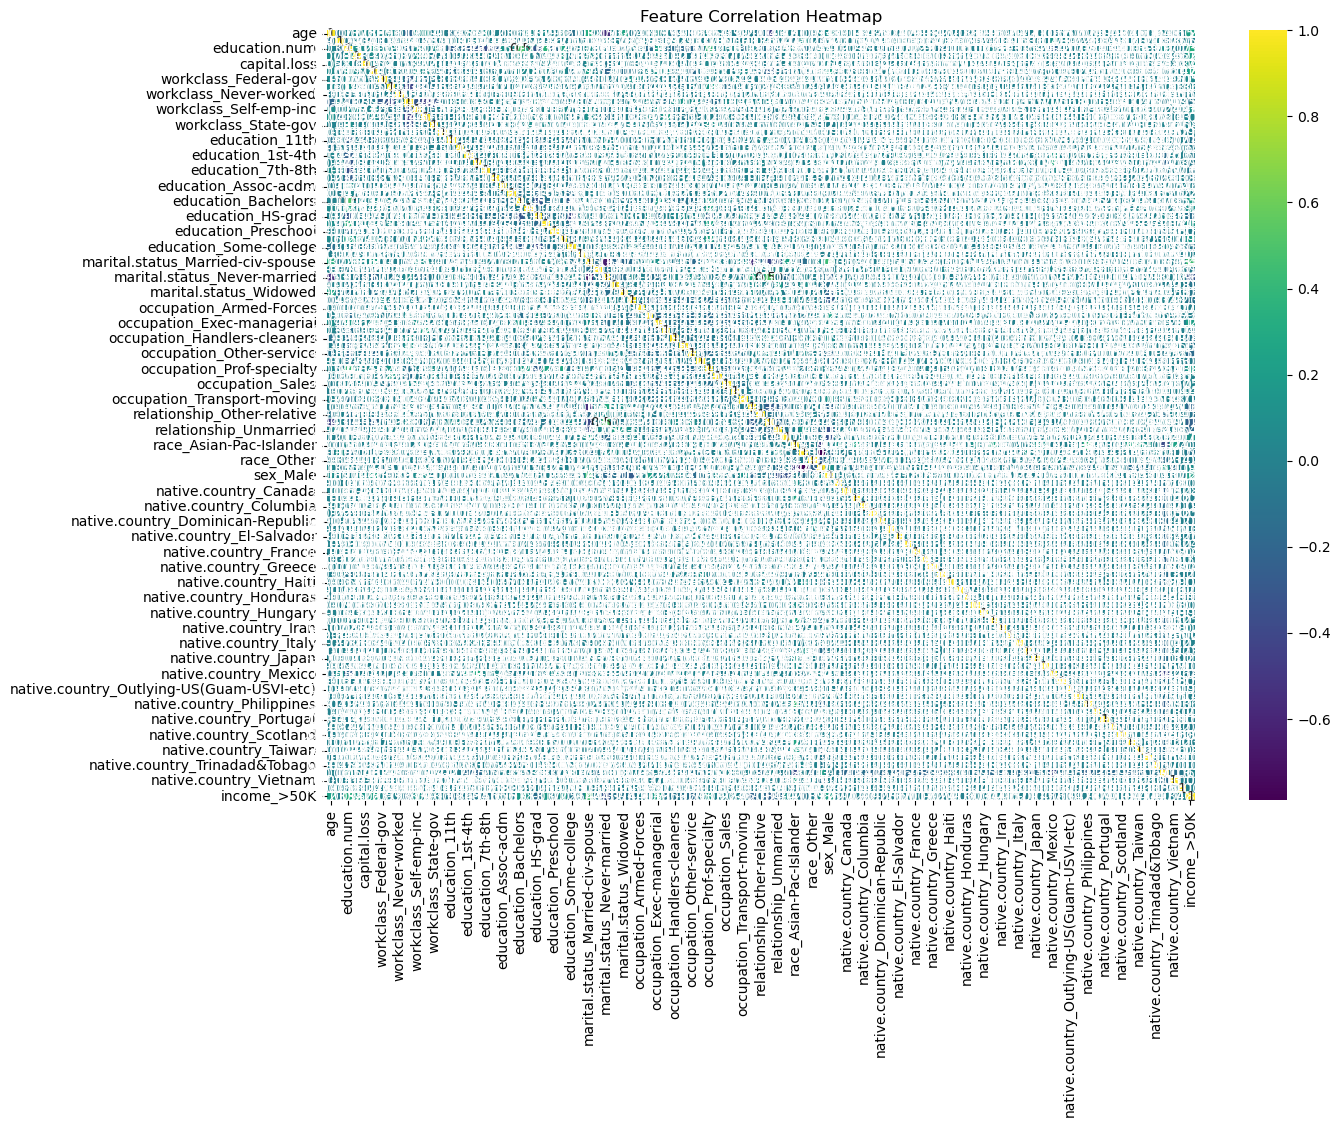

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of target variable
income_data['income_>50K'].value_counts().plot(kind='bar')
plt.title('Income Distribution')
plt.show()

# Correlation heatmap to explore feature relationships
plt.figure(figsize=(14, 10))
sns.heatmap(income_data.corr(), annot=True, cmap='viridis')
plt.title('Feature Correlation Heatmap')
plt.show()


# Model Building and Evaluation

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define features and target
X = income_data.drop('income_>50K', axis=1)
y = income_data['income_>50K']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Decision Tree Classifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# Logistic Regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Decision Tree Accuracy: 0.8192240761592794
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      7429
           1       0.62      0.62      0.62      2340

    accuracy                           0.82      9769
   macro avg       0.75      0.75      0.75      9769
weighted avg       0.82      0.82      0.82      9769

Logistic Regression Accuracy: 0.7984440577336472
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7429
           1       0.71      0.26      0.39      2340

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.63      9769
weighted avg       0.78      0.80      0.76      9769

SVM Accuracy: 0.7939400143310472
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      7429
           1       0.99      0.14      0.25      2340

    accuracy                           0.79      9769
   

# Conclusion

Based on the results from the three classification models—Decision Tree, Logistic Regression, and Support Vector Machine (SVM)—here’s a concise analysis of their performance:

Decision Tree:
Accuracy: 82%
Performance: Balanced precision and recall for both classes (0 and 1).
Strength: Identifies positives and negatives evenly, making it suitable when both outcomes are equally important.

Logistic Regression:
Accuracy: 80%
Performance: High precision (0.81) and recall (0.97) for class 0, but low recall (0.26) for class 1.
Strength: Ideal if avoiding false positives is a priority, though it misses many true positives (class 1).

Support Vector Machine (SVM):
Accuracy: 79%
Performance: Very high precision (0.99) for class 1 but extremely low recall (0.14).
Strength: Best for minimizing false positives but not suitable when capturing most true positives is important.

Overall Comparison:
Best Performer: Decision Tree, due to its balanced approach between precision and recall, offering reliable identification of both classes.
Logistic Regression is more conservative, favoring accurate predictions of non-positives.
SVM excels in precision for positives but at the cost of missing many actual cases.

Recommendations:
Decision Tree is preferred for balanced needs.
Logistic Regression is better if minimizing false alarms is critical.
SVM fits scenarios where each positive prediction must be highly reliable, even if some positives are missed.